In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install scipy
%pip install seaborn
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
train.shape

(891, 12)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EXPLORATORY DATA ANALYSIS - Begin

## Finding Missing Data - i.e NaN 

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

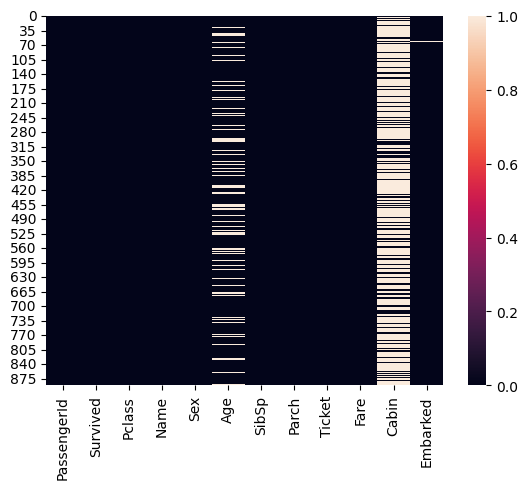

In [5]:
# Visualizing the null values using seaborn 
sns.heatmap(train.isnull()) # here the ouput will be if null is true - then 1, and if null is false - then 0. we are using heatmap so we can distinguish the parameters using the color.
# our main aim here is to find which "labels or categories" are not having the most no of 'NaN' - no value data across all the lables/categories. so heatmap is the best used here.

In [6]:
# Finding the relationship between the features.

<AxesSubplot:xlabel='Survived', ylabel='count'>

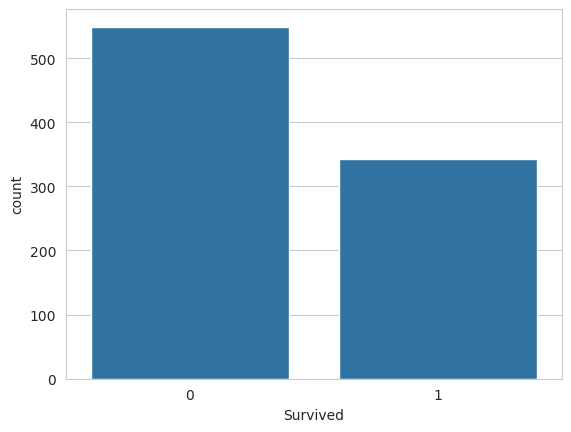

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train) # countplot is used to visulaize the count of people who survived or not here. 
# we are using stats count func but here using seaborn countplot we can also visualise it.

<AxesSubplot:xlabel='Survived', ylabel='count'>

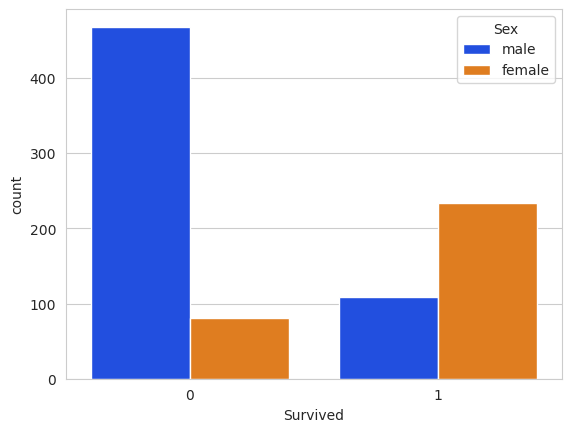

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex',palette ='bright') #counting the surviours/non surviours based on the sex- male/female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

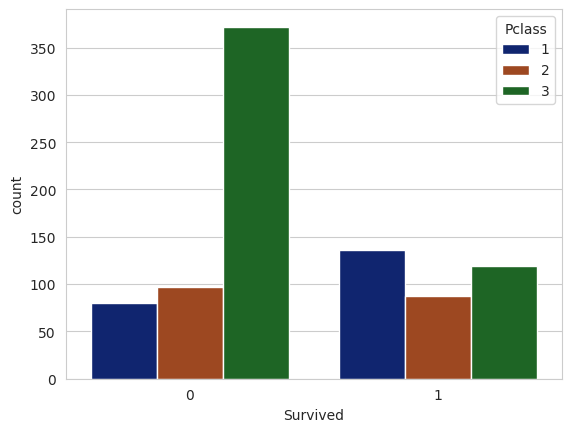

In [9]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette ='dark') #counting the surviours/non surviours based on the passenger class -1st class, 2nd class, 3rd class.

<AxesSubplot:xlabel='Age', ylabel='Count'>

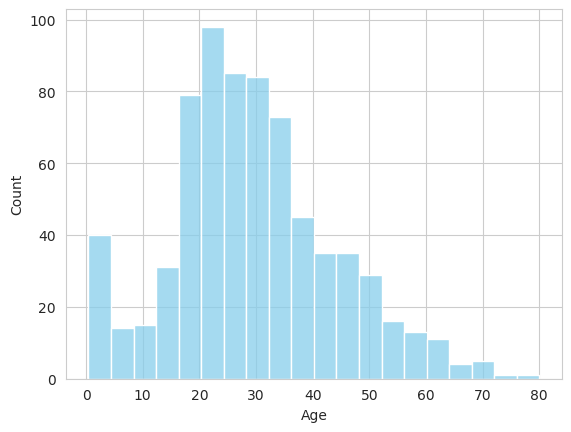

In [10]:
sns.histplot(train['Age'],color='skyblue') # here 

<AxesSubplot:xlabel='Age', ylabel='Count'>

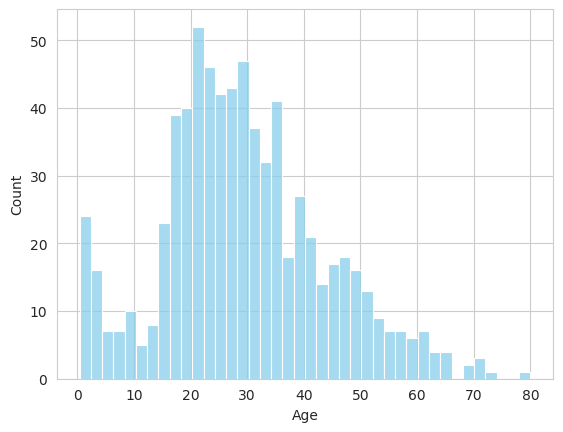

In [11]:
sns.histplot(train['Age'],bins=40, color='skyblue') # bins=40 will have 40 bars, each representing the count of data points falling within that specific range of values. 
# here divides the total Age values into 40 intervals, creating a detailed view of its distribution across the entire range

<AxesSubplot:>

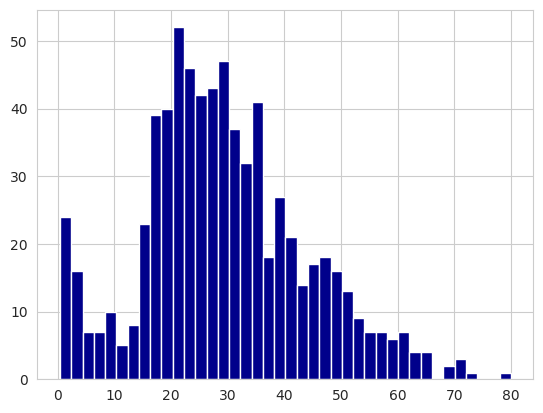

In [12]:
# using matplotlib 
train['Age'].hist(bins = 40, color = 'darkblue')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

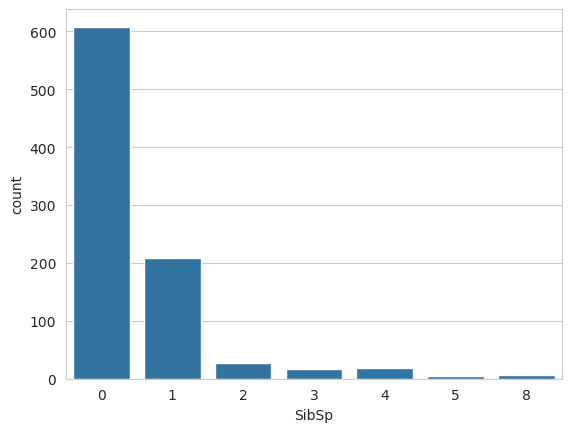

In [13]:
sns.countplot(data=train, x='SibSp')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

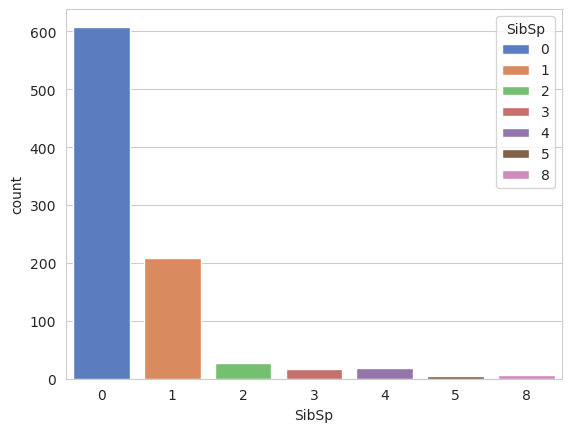

In [14]:
sns.countplot(data=train, x='SibSp', hue ='SibSp', palette='muted')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

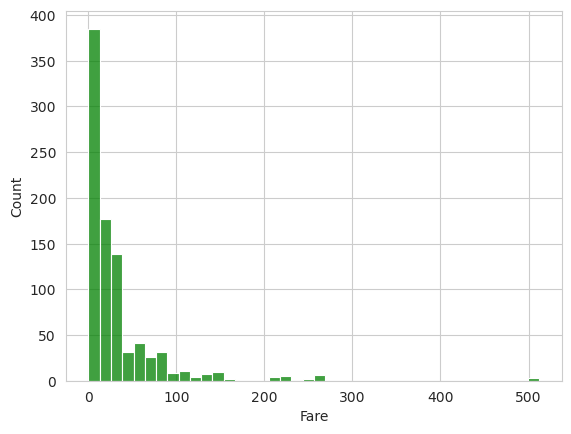

In [15]:
sns.histplot(data=train, x='Fare', bins=40, color='green')

# Data Cleaning

we are going to fill/replace the NaN values to a matching values for the missing data instead removing the missing values Na and it's corresponding rows.

the missing values are majorly in the Age and the cabin column. we can see the relationship between the passengerclass (Pclass) and Age column. 
One way of filling the Age column is using the mean age for the Nan vlaues. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

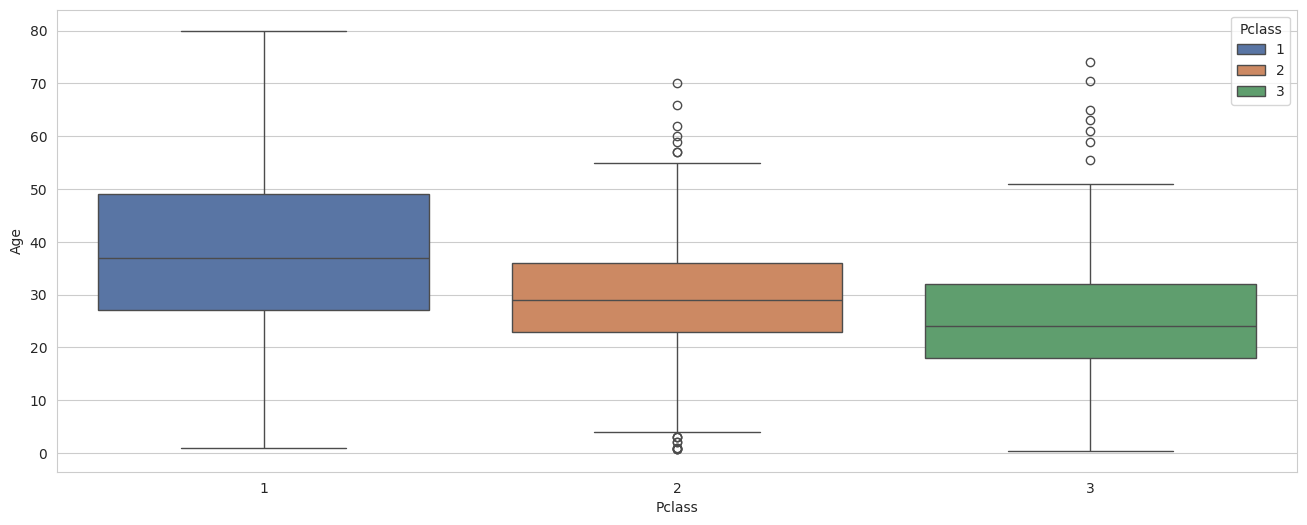

In [16]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Pclass',y='Age', data=train, hue = 'Pclass', palette='deep') # the middle line here is the 50th percentile (i.e) average value.

# we are creating a simple function to replace the age value to the average avg corresponding the passenger classes. 
from the above plot we are coming to a conclusion that average age of a person in Pclass 1 is 37 and Pclass 2 is 29 and Pclass 3 is 25

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1) # applies the impute_age function row-wise (because axis=1).

<AxesSubplot:>

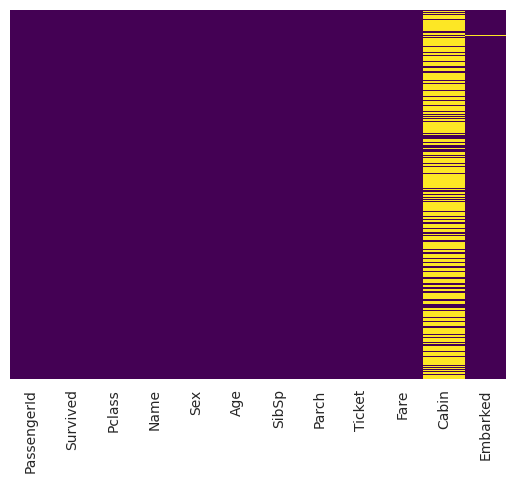

In [19]:
sns.heatmap(data = train.isnull(), yticklabels=False, cbar=False, cmap='viridis') # no Nan values in Age column. as we have replaced the missing value with the average age corresponding to the Pclass.

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train.shape #removed the cabin column

(891, 11)

<AxesSubplot:>

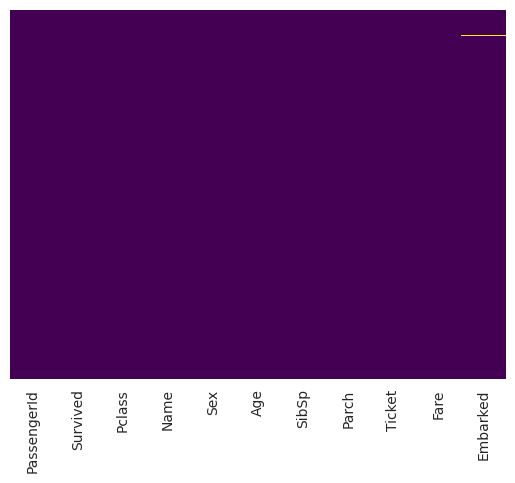

In [23]:
sns.heatmap(data = train.isnull(), yticklabels=False, cbar=False, cmap='viridis') ## no NaN values in Cabin column. as we have droped the entire column cabin as it had many NaN values. (But it can fixed using feature selection/engineering, will see it later)  

In [24]:
train['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

<AxesSubplot:xlabel='Embarked', ylabel='count'>

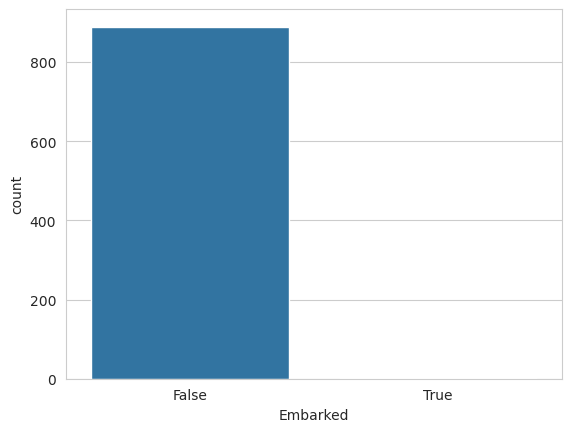

In [25]:
sns.countplot(x='Embarked', data=train.isnull()) #there is no NaN data in the embarked column but it has a missing data

In [26]:
train['Embarked'].replace('', np.nan, inplace=True)
# replacing the missing blank value with NaN value, so i can drop the NaN value using dropna 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:xlabel='Embarked', ylabel='count'>

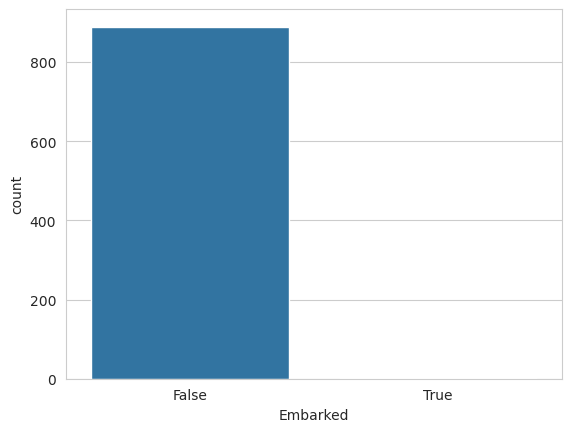

In [27]:
sns.countplot(x='Embarked', data=train.isnull())

In [28]:
train['Embarked'].dropna(axis=0,inplace=True) # dropping any rows that contain the missing value (NaN) corresponding to the "Embarked" column

In [29]:
train.iloc[62] # populates/locates all the values in row 62 along with the lable names

PassengerId                             63
Survived                                 0
Pclass                                   1
Name           Harris, Mr. Henry Birkhardt
Sex                                   male
Age                                   45.0
SibSp                                    1
Parch                                    0
Ticket                               36973
Fare                                83.475
Embarked                                 S
Name: 62, dtype: object

In [30]:
train['Embarked'].iloc[62] # checking the embarked value of row 62 as in excel it showed the missing value there

'S'

<AxesSubplot:>

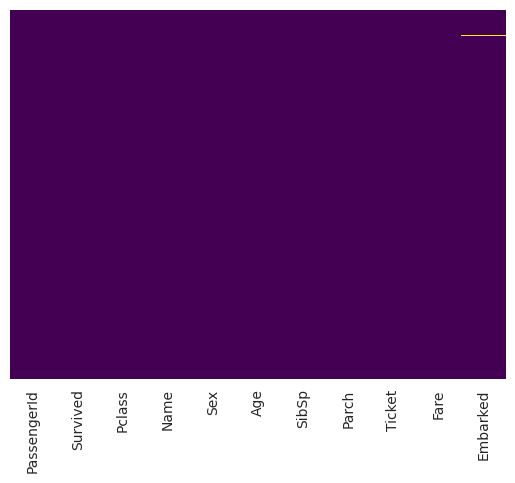

In [31]:
sns.heatmap(data = train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [32]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [34]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


# Converting Categorical Feature
we need to convert categorical features into dummy variables using pandas. otherwise our machine learning algorithm will won't be able to directly take those features as a inputs.

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


In [36]:
pd.get_dummies(train['Embarked']) # get_dummies is a function in pandas used for converting categorical data into numerical data, specifically into one-hot encoded vectors.

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [37]:
pd.get_dummies(train['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [38]:
sex = pd.get_dummies(train['Sex'], drop_first=True) #sex has 2 variables 'male/female'. one hot encoding's get dummies create a separate column for each with 0/1 data. 'drop_first=true' drops the first column 'female', so only male is present 
embark = pd.get_dummies(train['Embarked'], drop_first=True) # Embarked has 3 variables C/Q/S . each creating a separate columns using get dummies.'drop_first=true' drops column C and we get only 2 columns with S and Q.
print(sex, embark)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]      Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]


In [39]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [40]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [41]:
train = pd.concat([train,sex,embark], axis=1) #concat - adds the sex and embark columns/series into train dataframe. axis=1 means select the columns.

In [42]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


## data is ready. now we need to split the data into dependent (variable you are trying to predict/ output variables) and independent (variables that you use to predict/ input variables) features.

# Building a logistic regression model. 
(lets spilt our data into training set and test set)

# Train Test split

In [43]:
train.drop('Survived', axis=1) # training dataset - (droping the output variable for training)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [44]:
train.drop('Survived', axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [46]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64


In [47]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
male             uint8
Q                uint8
S                uint8
dtype: object


<AxesSubplot:>

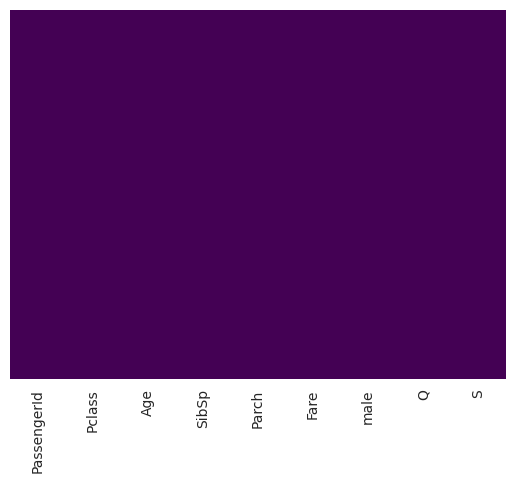

In [48]:
df = train.drop('Survived', axis=1)
# sns.heatmap(data = train.drop('Survived', axis=1), yticklabels=False, cbar=False, cmap='viridis') # this too wroks
sns.heatmap(data = df.isna(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Q', ylabel='count'>

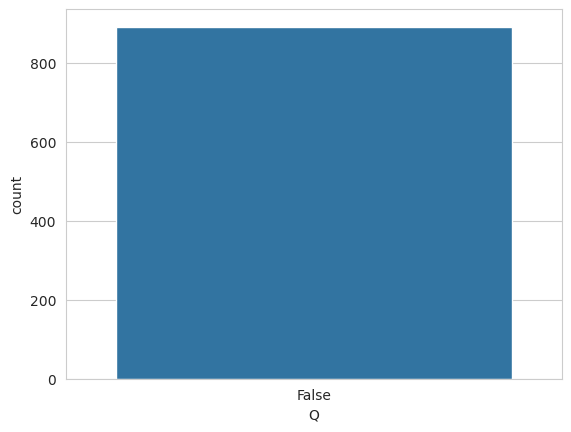

In [49]:
sns.countplot(x='Q', data=df.isna())

In [50]:
train['Survived'].head() # output/test dataset - (Has only the output variables)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
%pip install scikit-learn

In [52]:
import sklearn

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101) 
# random_state=101 ensures that the data is split in the same way every time you run this code.

# Training and Predicting

In [55]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression(max_iter=1000)

In [71]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [58]:
predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
accuracy = confusion_matrix(y_test,predictions)

In [61]:
accuracy

array([[134,  20],
       [ 41,  73]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7723880597014925

In [66]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)